### This tutorial is divided into following sections:


1.   Implementing Decision Tree from scratch
2.   Implementing Decision Tree using scikit-learn
3.   Implementing Decision Tree using Tensorflow



## Importing necessary library and dataset 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
from sklearn.datasets import load_boston
data=load_boston()
x=data['data'][:100]
y=data['target'][:100]

Decision Tree Regressor has fefw things in common with Decision Tree Classifier.
Decision Tree Regressor can be differentiated with splitting of data.In decisoin tree regressor mean squared error is used insted of gini index.


Mean Squared Error function in below class does following task:
calculates mean squared error for each group i.e. right group and left group.
And returns sum of meean sqaured error.This error is passed to get_split function and split is formed where mse is small.

Predict value is given by mean of target value in group.



In [116]:
class DecisionTreeRegressor():

  def __init__(self,max_depth,depth=1,min_size=1):
    self.max_depth=max_depth
    self.depth=depth
    self.min_size=min_size

  def fit(self,x,y):
    self.x=x
    self.y=y

    self.train=np.concatenate((x,y),axis=1)
    self.build_tree(self.train,self.max_depth,self.min_size)

  def mean_squared_error(self,groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    
    error = 0.0
    for group in groups:
      size = float(len(group))
      if size == 0:
        continue
      score = 0.0
      target=[row[-1] for row in group]
      #print(target)
      mean=sum(target)/len(target)
      for class_val in target:
        score += (mean-class_val)**2
      
      #Error is weight sum 
      error+=score/len(group)*(size)/n_instances
    
    return error

  def test_split(self,index, value, dataset):
    left, right = list(), list()
    left_value,right_value = list(),list()
    for row in dataset:
      if row[index] < value:
        left.append(row)
      else:
        right.append(row)
    #print(left,right)
    return left, right

  def get_split(self,dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 99999999999999, None
    for index in range(len(dataset[0])-1):
      for row in dataset:
        groups = self.test_split(index, row[index], dataset)
        error = self.mean_squared_error(groups, class_values)
        if error < b_score:
          b_index, b_value, b_score, b_groups = index, row[index], error, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

  def to_terminal(self,group):
    #Calculaing mean value of group
    outcomes = sum([row[-1] for row in group])/len(group)
    return outcomes

  def split(self,node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
   
    if not left or not right:
      node['left'] = node['right'] = self.to_terminal(left + right)
      return
   
    if depth >= max_depth:
      node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
      return
   
    if len(left) <= min_size:
      node['left'] = self.to_terminal(left)
    else:
      node['left'] = self.get_split(left)
      self.split(node['left'], max_depth, min_size, depth+1)
   
    if len(right) <= min_size:
      node['right'] = self.to_terminal(right)
    else:
      node['right'] = self.get_split(right)
      self.split(node['right'], max_depth, min_size, depth+1)
    

  def build_tree(self,train, max_depth, min_size):
    self.node = self.get_split(train)
    self.split(self.node, max_depth, min_size, 1)


  def predict(self,x):
    results=np.array([0]*len(x))

    for i,row in enumerate(x):
      results[i]=self._get_prediction(self.node,row)

    return results

  def _get_prediction(self, node,row):
    if row[node['index']] < node['value']:
      if isinstance(node['left'], dict):
        return self._get_prediction(node['left'], row)
      else:
        return node['left']
    else:
      if isinstance(node['right'], dict):
        return self._get_prediction(node['right'], row)
      else:
        return node['right']


In [117]:
regressor=DecisionTreeRegressor(max_depth=5)
regressor.fit(x,y.reshape(-1,1))

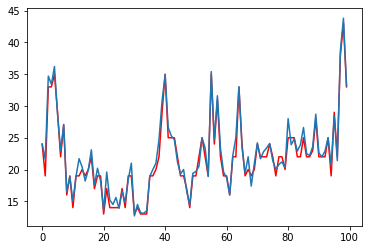

In [118]:
pred=regressor.predict(x)
plt.plot(pred,color='red')
plt.plot(y)

# Implementing Decision Tree using Scikit-Learn

Scikit-Learn has inbuilt DecisionTreeClassifier model which can be imported by using following line of code:

In [119]:
from sklearn.tree import DecisionTreeRegressor

## Paramters/Arguments
As we implemented DecisionTreeRegressor and it has some arguments or parameter such as max_depth,depth,min_size. Similarly scikit-learn's decision tree also has parameters.Some of them are as follows:

1. criterion : 'mse' or 'mae' or 'friedman_mse' criteria used to reduce variance

2. max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

3. min_samples_split : int or float, default=2
 The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.


4. min_samples_leaf : int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node. 

5. max_leaf_nodes : int, default=None
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

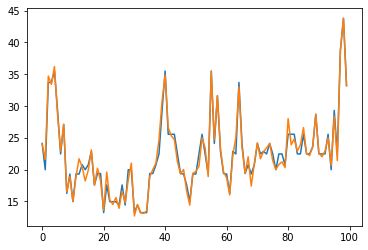

In [120]:
regressor=DecisionTreeRegressor(max_depth=5)
regressor.fit(x,y)
pred=regressor.predict(x)
plt.plot(pred)
plt.plot(y)

# Implementing Decision Tree using Tensorflow 
Tensorflow also contains inbuilt model for decision tree.The following line of code can be used to import it.

In [121]:
import tensorflow as tf
from tensorflow.estimator import BoostedTreesRegressor

## Defining Dataset parameters and building

Before instantiating regressor we must give names to our feature columns because BoostedTreesRegressor accepts dataset in such a way. 

In [122]:
# Dataset parameters.
num_features = 13 # data features size.

# Training parameters.
max_steps = 200
batch_size = 2
learning_rate = 1.0
l1_regul = 0.0
l2_regul = 0.1

# GBDT parameters.
num_batches_per_layer = 4
num_trees = 1
max_depth = 5

## Building Input Function:

In [123]:
# Build the input function.
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x}, y=y,
    batch_size=batch_size, num_epochs=None, shuffle=True)

test_train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x}, y=y,
    batch_size=batch_size, num_epochs=1, shuffle=False)


# GBDT Models from TF Estimator requires 'feature_column' data format.
feature_columns = [tf.feature_column.numeric_column(key='x', shape=(num_features,))]

In [125]:
regressor = tf.estimator.BoostedTreesRegressor(
    n_batches_per_layer=num_batches_per_layer,
    feature_columns=feature_columns,
    learning_rate=learning_rate, 
    n_trees=num_trees,
    max_depth=max_depth,
    l1_regularization=l1_regul, 
    l2_regularization=l2_regul
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1gy8985h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training Regressor:
Training our regressor using train_input_fn which contains our training data

In [126]:
regressor.train(input_fn=train_input_fn,max_steps=max_steps)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'nam

## Evaluating Regressor:
We can evaluate our model using evaluate attribute of regressor<br>
Note: Here we are evaluating regressor on training data

In [128]:
evaluation=regressor.evaluate(test_train_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-22T05:22:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1gy8985h/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.30702s
INFO:tensorflow:Finished evaluation at 2020-08-22-05:22:45
INFO:tensorflow:Saving dict for global step 20: average_loss = 26.233543, global_step = 20, label/mean = 22.309004, loss = 26.233543, prediction/mean = 21.77447
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'_Resource' object has no attribute 'name'
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20: /tmp/tmp1gy8985h/model.ckpt-20


In [129]:
print(evaluation)

{'average_loss': 26.233543, 'label/mean': 22.309004, 'loss': 26.233543, 'prediction/mean': 21.77447, 'global_step': 20}


In [136]:
#This gives us a generator object
pred=regressor.predict(test_train_input_fn)

#Converting generator objects to list then accessing predicted value by using 'predictions'
results=list(pred)
pred=[]
for result in results:
 pred.append(result['predictions'][0])

print(pred)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1gy8985h/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[23.062757, 22.91589, 22.91589, 31.48732, 31.48732, 31.48732, 20.127657, 16.527588, 17.402514, 17.402514, 16.527588, 19.25076, 20.127657, 19.005753, 19.005753, 19.005753, 13.152718, 19.005753, 19.005753, 19.005753, 13.152718, 19.005753, 16.527588, 13.152718, 19.005753, 19.005753, 19.005753, 13.152718, 16.527588, 16.527588, 13.152718, 13.152718, 13.152718, 13.152718, 13.152718, 21.699085, 21.699085, 21.699085, 17.402514, 23.062757, 23.062757, 26.936508, 16.527588, 16.527588, 19.25076, 17.402514, 17.402514, 17.402514, 19.005753, 17.402514, 21.699085, 23.062757, 23.062757, 21.699085, 21.699085, 23.062757, 23.062757, 23.062757, 16.527588, 21.699085, 17.402514, 17.402514, 33.45616, 33.45616, 23.062757, 23.062757, 21.699085, 20.12

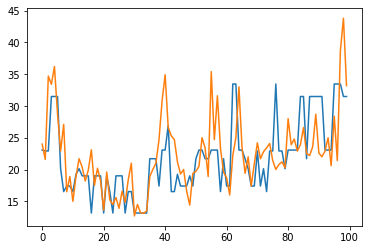

In [137]:
plt.plot(pred)
plt.plot(y)